결측치 = 값 없는 null


# 데이터 확인

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/colab/Data_test/train.csv")
df.head()

FileNotFoundError: [Errno 2] File /content/drive/MyDrive/colab/Data_test/train.csv does not exist: '/content/drive/MyDrive/colab/Data_test/train.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측값 처리

In [ ]:
df.isnull().sum() #값이 없니?
#df1.isnull().sum().sum()  # sum()이 2번이면 전체 dataframe에서 null값을 계수함

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop(['Cabin'],axis=1) 
#axis=1 은 cabin 컬럼을 세로로 drop하겠다 즉 컬럼을 다 날리겠다는 뜻 , inplace = True 는 이 문장을 바로 실행하겠단 의미

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Age']
df.Age
#컬럼 지정 출력

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [1]:
df.Embarked.value_counts(dropna=False)
#df.컬럼명.값.세보자()

NameError: name 'df' is not defined

In [ ]:
df.Embarked = df.Embarked.fillna('S')
#df.~ = df.~. fillna

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
# df.Age.value_counts() # age 는 이걸로 못봐요 수가 너무 많아서 

In [ ]:
a= df.Age.mean()

In [ ]:
df.Age = df.Age.fillna(round(a))

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 전처리 = 컴퓨터가 알아듣게 숫자로 바꾸고 결측치도 처리하고 정확도 높이기 위해 여러가지 처리

In [ ]:
df.describe()
#std = 표준 편차 ,mean = 평균

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
def cat_age(x):
  if x <= 5:
    x= "baby"
  elif x<=12:
    x = "child"
    # 하면서 내가 의심된다니까 이거 아닌 거 같다는;;
  elif x<=18:
    x = "teenager"
  elif x<=25:
    x = "student"
  elif x<=60:
    x = "adult"
  else:
    x = "elderly"
  
  return x

In [ ]:
df_age = df.Age.apply(cat_age)

In [ ]:
df_age
# 이건 시리즈 형태

0      student
1        adult
2        adult
3        adult
4        adult
        ...   
886      adult
887    student
888      adult
889      adult
890      adult
Name: Age, Length: 891, dtype: object

In [ ]:
df[['Age']]
# 대괄호 두개하면 dataframe으로 보이고 / 하나하면 series (스펠링모름) 으로 보임

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,30.0
889,26.0


In [ ]:
# 그러면 저걸 대입하려면 

df['Age'] = df_age

In [ ]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,student,1,0,A/5 21171,7.25,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
# alt + enter = 해당 셀 실행 후 새로운 셀 삽입 (* 다음 작업 공간이 없을 때)
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Age'] = le.fit_transform(df['Age'])

In [ ]:
# df = df.drop(['Ticket'],axis=1) 

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,4,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,1,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,5,1,0,237736,30.0708,0


In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# df.Fare.describe()[0]  # 이걸하면 count의 수가 나옴

In [ ]:
print('0: ',df.Fare.describe()[3])
print('25: ',df.Fare.describe()[4])
print('75: ',df.Fare.describe()[5])
print('100: ',df.Fare.describe()[6])


0:  0.0
25:  7.9104
75:  14.4542
100:  31.0


In [ ]:
a= df.Fare.describe()[3]
b= df.Fare.describe()[4]
c= df.Fare.describe()[5]
d= df.Fare.describe()[6]

In [ ]:
def cat_fare(x):
  if a<= x <b :
    x = 0
  elif b<= x <c:
    x = 1
  elif c<= x <d:
    x =2
  else:
    x = 3
  return x

In [ ]:
df_fare = df.Fare.apply(cat_fare)

In [ ]:
df['Fare'] = df_fare

In [ ]:
df = df.drop(['Name'],axis=1) 

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,4,1,0,A/5 21171,0,2
1,2,1,1,0,0,1,0,PC 17599,3,0
2,3,1,3,0,0,0,0,STON/O2. 3101282,1,2
3,4,1,1,0,0,1,0,113803,3,2
4,5,0,3,1,0,0,0,373450,1,2
5,6,0,3,1,0,0,0,330877,1,1
6,7,0,1,1,0,0,0,17463,3,2
7,8,0,3,1,1,3,1,349909,2,2
8,9,1,3,0,0,0,2,347742,1,2
9,10,1,2,0,5,1,0,237736,2,0


In [ ]:
df = df.drop(["Ticket"],axis=1)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Training

In [ ]:
X = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
Y=df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=42)  # train_test_split을 쓰기 위해선 아무것도 바꾸면 안되고 그냥 외워야 함
# x_train = train 독립변수 X, x_val 은 validation 독립변수들,y train은 train에 있는 종속변수(생존여부), y_val = 검증 데이터 생존 여부
# 그냥 train은 학습용~ x는 독립변수들이고 y는 종속변수(값)이다~생각.

In [ ]:
from sklearn.metrics import accuracy_score # 정확도를 측정하는 sklearn의 능력입니다 

In [ ]:
from sklearn.linear_model import LogisticRegression # LogisticRegression 이름은 회귀지만 분류 모델임

logreg = LogisticRegression(max_iter=30000) # 로지스틱 회귀의 능력을 logreg에 주입
# max_iter는 뭔지 모르지만 모델 마다 저기 안에 넣어야 하는 게 다름 여러개 해보고 잘 되는 걸로 해야함 경험적 수치임 멍청이가 뭐를 알아듣는지 계속 주입해보면서 알아듣는 걸 써야함 숫자 바꾸면 정확도도 바뀜

logreg.fit(x_train,y_train) # fit = 학습 시키는 것, 문제는 x_train이고 답은 y_train이야~

y_predict=logreg.predict(x_val)  # y 예측

# accuracy_score로 예측된 y값(y_predict) /  원래 val의 종속변수(y_val) 값 비교
# round (a,2) : a를 소수점 두자리수까지 반올림          
acc_log = round(accuracy_score(y_predict,y_val)*100,2) 

print('logistic 정확도: ' ,acc_log, '%')

logistic 정확도:  77.09 %


In [ ]:
from sklearn.svm import SVC


svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print('svc 정확도: ',acc_svc,'%')

svc 정확도:  81.56 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print('random forest 정확도: ',acc_randomforest, '%')

random forest 정확도:  83.24 %


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print('gradientboosting 정확도:', acc_gbc, '%')

gradientboosting 정확도: 79.33 %


# -

In [ ]:
# 자주 사용하는 분류모델들 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,4,1,0,0,2
1,2,1,1,0,0,1,0,3,0
2,3,1,3,0,0,0,0,1,2
3,4,1,1,0,0,1,0,3,2
4,5,0,3,1,0,0,0,1,2


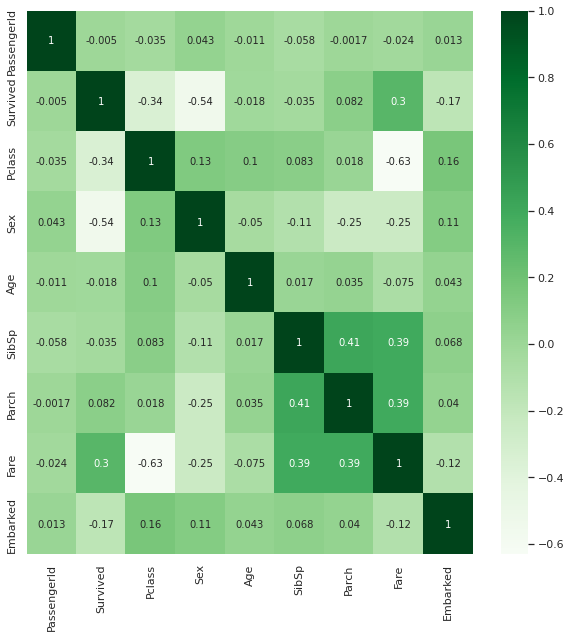

In [ ]:
# 시각화 하는 애들
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(rc = {'figure.figsize':(10,10)})

corr= df.corr()   #  corr은 상관계수 
df_heatmap= sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size':10}, cmap='Greens')



In [ ]:
df_

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


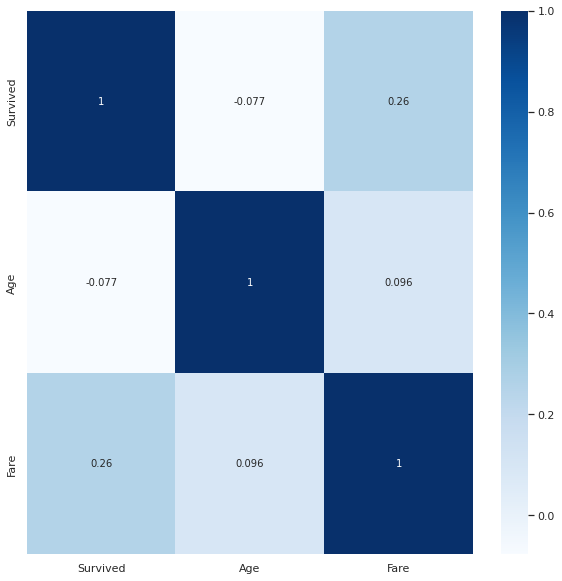

In [ ]:
df_ = pd.read_csv("/content/drive/MyDrive/colab/Data_test/train.csv")

df_ = df_[['Survived','Age','Fare']]


corr_= df_.corr()   #  corr은 상관계수 
df__heatmap= sns.heatmap(corr_, cbar=True, annot=True, annot_kws={'size':10}, cmap='Blues')

